# BibRec: Training Random Forest Model

### RF Features: Country, State, Age, Year-of-Publication, Publisher

In [1]:
from bibrec.server.Utils import get_normalized_data, hot_encode_data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/BX-Books.csv', users_path='data/BX-Users.csv', ratings_path='data/BX-Book-Ratings.csv')
books, users = hot_encode_data(books, users)

/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path, sep=";", encoding="latin-1")


With NaN values 34.862889904962536
used mean values 34.890185268705686


/run/media/fab/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:37: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  location_seperated = users.location.str.split(',', 2, expand=True)


In [2]:
users.describe()

,user_id,age,user_mean,user_count,country_argentina,country_australia,country_austria,country_brazil,country_canada,country_china,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
count,278858.00000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,...,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000,278858.000000
mean,139429.50000,34.890185,1.830521,1.377335,0.003855,0.042025,0.004067,0.005982,0.077301,0.005236,...,0.013961,0.013376,0.016793,0.031328,0.015495,0.514584,0.021818,0.030094,0.015456,0.020885
std,80499.51502,13.851340,3.315885,20.810253,0.061969,0.200647,0.063640,0.077109,0.267069,0.072168,...,0.117327,0.114879,0.128497,0.174202,0.123512,0.499788,0.146088,0.170847,0.123357,0.143000
min,1.00000,0.003578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69715.25000,24.753845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,139429.50000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,209143.75000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,278858.00000,110.000000,10.000000,6957.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
books.describe()

,year_of_publication,rating_mean,rating_count,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
count,271261.00000,150019.000000,271264.000000,271261.00000,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000,...,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000,271264.000000
mean,1993.11594,7.527728,1.436206,11.88406,0.013946,0.013444,0.010215,0.008324,0.027781,0.009312,...,0.007539,0.011649,0.007631,0.015557,0.010919,0.006558,0.007200,0.006282,0.010042,0.006245
std,9.32072,1.710492,5.901315,9.32072,0.117266,0.115168,0.100553,0.090856,0.164345,0.096048,...,0.086498,0.107301,0.087021,0.123753,0.103923,0.080717,0.084545,0.079008,0.099705,0.078777
min,1376.00000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.00000,6.500000,0.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1995.00000,8.000000,1.000000,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.00000,9.000000,1.000000,16.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2005.00000,10.000000,711.000000,629.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# limit data volume
df_ratings = ratings.groupby('isbn13').user_id.count().sort_values(ascending=False)
df_ratings = ratings[:1000]
df_ratings = df_ratings.reset_index()

In [5]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
tmp_users = users.filter(regex="user_id|age|country_|state_", axis=1)
tmp_books = books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
# df = df_ratings.filter(regex="isbn13|user_id|normalized_rating", axis=1)
df = df_ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df = df.merge(tmp_users)
df = df.merge(tmp_books)

In [6]:
df_ratings

,index,user_id,isbn,book_rating,isbn13,age,city,state,country,user_mean,user_count,normalized_rating
0,0,276726,0155061224,5,9780155061224,27.176583,seattle,washington,usa,5.0,1.0,0.0
1,1,276729,052165615X,3,9780521656153,16.000000,rijeka,n/a,other,4.5,2.0,-1.5
2,2,276729,0521795028,6,9780521795029,16.000000,rijeka,n/a,other,4.5,2.0,1.5
3,3,276744,038550120X,7,9780385501200,42.231590,torrance,california,usa,7.0,1.0,0.0
4,4,276747,0060517794,9,9780060517793,25.000000,iowa city,other,usa,8.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,277774,0451524462,7,9780451524461,17.000000,plaquemine,other,usa,7.0,1.0,0.0
996,996,277776,0345339681,7,9780345339683,17.000000,baton rouge,other,usa,7.0,1.0,0.0
997,997,277778,0061097314,8,9780061097317,17.000000,baton rouge,other,usa,8.0,1.0,0.0
998,998,277782,0425173739,7,9780425173732,17.000000,baton rouge,other,usa,7.0,1.0,0.0


In [7]:
# Features
X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [8]:
X

,age,country_argentina,country_australia,country_austria,country_brazil,country_canada,country_china,country_france,country_germany,country_india,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,27.176583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.231590,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,36.169725,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1008,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010,17.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y

0       5
1       3
2       6
3       7
4       9
       ..
1007    7
1008    7
1009    8
1010    7
1011    8
Name: book_rating, Length: 1012, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [11]:
from os.path import exists
import pickle

# Load the model from the file
file="random_forest_classifier5.pkl"

if exists(file):
    print("Loading file:", file)
    with open(file, "rb") as file:
        rfc = pickle.load(file)
else:
    print("Creating new model")
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

Creating new model


In [12]:
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1)

In [13]:
import pickle

# Save the model to a file
with open("rf5.pkl", "wb") as file:
    pickle.dump(rfc, file)

In [14]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.21      0.21      0.21        29
           6       0.19      0.10      0.13        31
           7       0.27      0.21      0.24        56
           8       0.29      0.34      0.31        77
           9       0.27      0.29      0.28        42
          10       0.36      0.45      0.40        58

    accuracy                           0.28       304
   macro avg       0.16      0.16      0.16       304
weighted avg       0.27      0.28      0.27       304

27.960526315789476


/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fab/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[ 0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  1  0  2  3  0  0]
 [ 0  1  1  0  6  0  4  6  7  4]
 [ 0  0  2  0  4  3  6  6  5  5]
 [ 0  0  0  0  6  2 12 19  5 12]
 [ 0  0  1  2  3  8 10 26  7 20]
 [ 0  0  1  0  5  3  3 13 12  5]
 [ 0  0  1  0  3  0  8 12  8 26]]
Normalized confusion matrix
[[0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.17 0.   0.33 0.5  0.   0.  ]
 [0.   0.03 0.03 0.   0.21 0.   0.14 0.21 0.24 0.14]
 [0.   0.   0.06 0.   0.13 0.1  0.19 0.19 0.16 0.16]
 [0.   0.   0.   0.   0.11 0.04 0.21 0.34 0.09 0.21]
 [0.   0.   0.01 0.03 0.04 0.1  0.13 0.34 0.09 0.26]
 [0.   0.   0.02 0.   0.12 0.07 0.07 0.31 0.29 0.12]
 [0.   0.   0.02 0.   0.05 0.   0.14 0.21 0.14 0.45]]


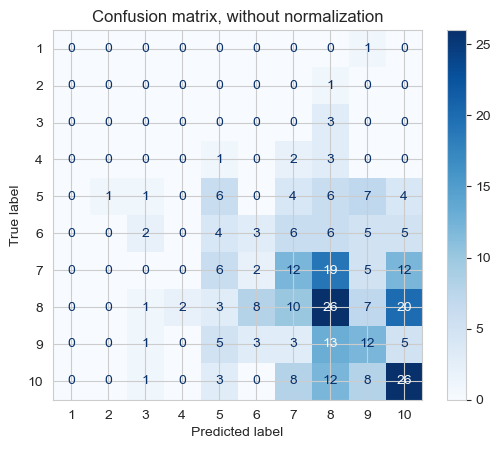

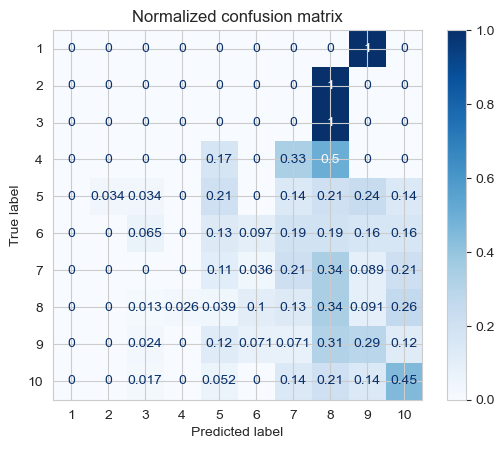

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [16]:
rfc.score(X_train, y_train)

0.8389830508474576

In [17]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances',ascending=False)
feature_importance

,Feature_names,Importances
43,normalized_year_of_publication,0.419172
0,age,0.259480
51,publisher_other,0.026011
41,state_virginia,0.018594
38,state_other,0.016574
...,...,...
48,publisher_harlequin,0.000000
9,country_india,0.000000
16,country_singapore,0.000000
6,country_china,0.000000


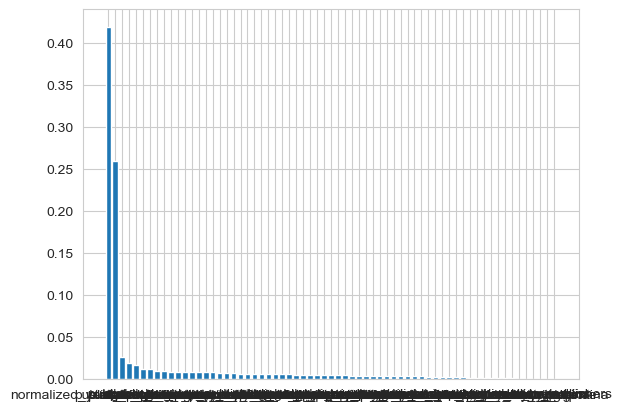

In [18]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [19]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex = True)]
country_importance

,Feature_names,Importances
21,country_usa,0.012252
8,country_germany,0.008834
5,country_canada,0.007562
19,country_switzerland,0.006993
12,country_netherlands,0.006591
7,country_france,0.006076
17,country_spain,0.006038
20,country_united_kingdom,0.005921
3,country_austria,0.005710
14,country_other,0.004323


In [20]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex = True)]
state_importance

,Feature_names,Importances
41,state_virginia,0.018594
38,state_other,0.016574
24,state_california,0.011211
42,state_washington,0.009400
30,state_missouri,0.007720
37,state_oregon,0.005546
29,state_michigan,0.005515
32,state_new_york,0.005505
27,state_illinois,0.004953
33,state_nordrhein-westfalen,0.004713


In [21]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex = True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())

age: 0    0.25948
Name: Importances, dtype: float64
country_importance: 0.0884281572539308
state_importance: 0.1223473691957925
